In [5]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [3]:
## Load the data into a DataFrame
df = pd.read_csv('/Users/EKandTower/GA-DSI/projects/projects-weekly/project-03/starter-code/Iowa_Liquor_sales_sample_10pct.csv')
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [7]:
## Transform the dates column to datetime
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y')

In [8]:
# Seems like there are duplicates in city where the upper and lower case doesnt match
df['City'] = df['City'].map(lambda x: x.title())

# Guttenberg has been misspelled in some entries
df['City'] = df['City'].map(lambda x: 'Guttenberg' if x == 'Guttenburg' else x)

# Let's use Arnolds Park without the apostrophe
df['City'] = df['City'].map(lambda x: 'Arnolds Park' if x == "Arnold'S Park" else x)

# Kellogg has been misspelled in some entries
df['City'] = df['City'].map(lambda x: 'Kellogg' if x == 'Kellog' else x)

# Let's use Mount instead of Mt
df['City'] = df['City'].map(lambda x: 'Mount Pleasant' if x == "Mt Pleasant" else x)
df['City'] = df['City'].map(lambda x: 'Mount Vernon' if x == "Mt Vernon" else x)

# Ottumwa has been misspelled in some entries
df['City'] = df['City'].map(lambda x: 'Ottumwa' if x == 'Ottuwma' else x)

# Remove city from Rockwell city
df['City'] = df['City'].map(lambda x: 'Rockwell' if x == 'Rockwell City' else x)

df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,Sumner,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,Davenport,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,Cedar Falls,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,Ames,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,Belmond,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [9]:
# Zip code should be integers

# Find the entries which are causing the type to be forced to object
# We may have to do this a few times, so we'll define a function that takes a column name to do it

def find_non_int(col):
    non_int = []
    for i in df[col]:
        try:
            int(i)
        except:
            if i not in non_int:
                non_int.append(i)
    non_int = pd.Series(non_int)
    return non_int.value_counts(dropna=False)
print find_non_int('Zip Code')

712-2    1
dtype: int64


In [10]:
# Find the cities that have '712-2' as the zip code

df['City'][df['Zip Code'] == '712-2'].unique()
print df['Zip Code'][df['City'] == 'Dunlap'].unique()
print df['County'][df['City'] == 'Dunlap'].unique()
print df['County Number'][df['City'] == 'Dunlap'].unique()

['712-2']
['Harrison' nan]
[ 43.  nan]


In [11]:
# For all entries with 'DUNLAP' as city
# Set zip code as 51529
df.ix[df['City']=='Dunlap', 'Zip Code'] = '51529'

# Set county as Harrison
df.ix[df['City']=='Dunlap', 'County'] = 'Harrison'

# Set county number as 43.0
df.ix[df['City']=='Dunlap', 'County Number'] = '43.0'

In [12]:
# Now change zip code to integers
df['Zip Code'] = df['Zip Code'].astype(int)

In [13]:
# Write a function that cross references City, Zip Code, County and County Number
# and fills the data in where it's missing
def fill_missing(related_cols, column):
    related_cols.remove(column)
    reference = df[related_cols][df[column].isnull()].drop_duplicates()
    for j in range(len(related_cols)):
        col_1 = reference[related_cols[j]]
        for i in col_1:
            try:
                value = df[column][(df[related_cols[j]]==i) & (df[column].notnull())].drop_duplicates().iloc[0]
                df.iloc[(df[related_cols[j]]==i) & (df[column].isnull()), column] = value
            except:
                pass
fill_missing(['Store Number', 'City', 'Zip Code', 'County', 'County Number'], 'County')
fill_missing(['Category', 'Category Name'], 'Category Name')
fill_missing(['Category', 'Category Name'], 'Category')
fill_missing(['Item Number', 'Item Description'], 'Item Description')
fill_missing(['Item Number', 'Item Description'], 'Item Number')

In [14]:
# Convert all dollar columns to floats
df['State Bottle Cost'] = df['State Bottle Cost'].map(lambda x: x.strip('$')).astype(float)
df['State Bottle Retail'] = df['State Bottle Retail'].map(lambda x: x.strip('$')).astype(float)
df['Sale (Dollars)'] = df['Sale (Dollars)'].map(lambda x: x.strip('$')).astype(float)

In [15]:
#rename columns
cols = ['Date', 'Store Number', 'City', 'Zip Code', 'County', 'Category', 'Category Name', \
        'Vendor Number', 'Item Number', 'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost', \
        'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)']

In [16]:
# read in demo file
demo_df = pd.read_csv('//Users/EKandTower/Dropbox/GA-DSI/Iowa Liquor/IowaZIPdemos.csv')

In [17]:
#drop nas from the demo file.
#change zip code column to int
demo_df.dropna(inplace=True)
demo_df['Area'] = demo_df['Area'].astype(int)

In [18]:
# make a list of which columns are object type
demo_cols = demo_df.columns.values.tolist()
object_cols = [i for i in demo_cols if demo_df[i].dtype == 'O']

In [19]:
#remove symbols that keep numbers from being numeric types and make new list of them 
def rem_symbols(x):
    for i in [',', '%', '$', '-']:
        x = x.replace(i, '')
    try:
        return float(x)
    except:
        print x
    
for i in object_cols:
    demo_df[i] = demo_df[i].map(rem_symbols)

In [20]:
# Merge lists
df3 = df.merge(demo_df, left_on='Zip Code', right_on='Area')
df3.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Family households,Married-couple family households,Single mother households,Nonfamily households,Single Occupancy,Avg HH Size,Avg Family Size,Pop Below Poverty Level,% P25+ HS Grad,% P25-54 BA+
0,2015-11-04,3717,Sumner,50674,9,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,1077.0,949.0,76.0,433.0,394.0,2.48,3.0,3616.0,87.2,13.8
1,2015-06-10,3717,Sumner,50674,9,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,1077.0,949.0,76.0,433.0,394.0,2.48,3.0,3616.0,87.2,13.8
2,2015-01-21,3717,Sumner,50674,9,Bremer,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,322,75211,...,1077.0,949.0,76.0,433.0,394.0,2.48,3.0,3616.0,87.2,13.8
3,2015-11-11,3717,Sumner,50674,9,Bremer,1012100.0,CANADIAN WHISKIES,115,11777,...,1077.0,949.0,76.0,433.0,394.0,2.48,3.0,3616.0,87.2,13.8
4,2015-01-07,3717,Sumner,50674,9,Bremer,1011200.0,STRAIGHT BOURBON WHISKIES,65,19476,...,1077.0,949.0,76.0,433.0,394.0,2.48,3.0,3616.0,87.2,13.8


In [23]:
# Convert Month and Year columns to Date
df3['Month'] = df3['Date'].map(lambda x: x.month)
df3['Year'] = df3['Date'].map(lambda x: x.year)

In [24]:
features = df3.columns.values.tolist()
features

['Date',
 'Store Number',
 'City',
 'Zip Code',
 'County Number',
 'County',
 'Category',
 'Category Name',
 'Vendor Number',
 'Item Number',
 'Item Description',
 'Bottle Volume (ml)',
 'State Bottle Cost',
 'State Bottle Retail',
 'Bottles Sold',
 'Sale (Dollars)',
 'Volume Sold (Liters)',
 'Volume Sold (Gallons)',
 'Area',
 'Total Pop',
 'Median HH Inc',
 'Per Capita Inc',
 'White',
 'Afr Amer',
 'Native Amer',
 'Asian Amer',
 'Pac Islander',
 'Other',
 'Bi- Multi-Racial',
 'Hispanic or Latino',
 'Med Age',
 '<5 years',
 '5-17 yrs',
 '18-20 yrs',
 '21-24 yrs',
 '25-34 yrs',
 '35-44 yrs',
 '45-54 yrs',
 '55-59 yrs',
 '60-64 yrs',
 '65-74 yrs',
 '78-84 yrs',
 '85+ yrs',
 '% P16+ in labor force',
 'Total # Homes Owned',
 'Med. Home Value',
 'Tot Housing units',
 'Owner occupied housing units',
 'Renter occupied housing units',
 'households',
 'Family households',
 'Married-couple family households',
 'Single mother households',
 'Nonfamily households',
 'Single Occupancy',
 'Avg HH Siz

In [26]:
#create pivot table adding up the Bottle Sold, Volume Sold (Liters), and Sale (Dollars) by Store Number, Zip Code\
# , and Year

df4 = pd.pivot_table(df3, index=['Store Number', 'Zip Code','Year'], \
               values=['Bottles Sold', 'Volume Sold (Liters)', 'Sale (Dollars)'], aggfunc=sum).reset_index()

In [27]:
#Create csv of data
df4.to_csv('/Users/EKandTower/GA-DSI/projects/projects-weekly/project-03/starter-code/liqour_plus_demo_ajb.csv')
df4.head()

,Store Number,Zip Code,Year,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2106,50613,2015,10367,146326.22,9731.85
1,2106,50613,2016,2220,30523.75,2117.75
2,2113,50543,2015,671,9310.22,659.85
3,2113,50543,2016,159,2065.90,177.00
4,2130,50703,2015,7430,111871.43,6891.37


In [31]:
# create new dataframe merging the demo database with the result of the pivot table
df5 = df4.merge(demo_df, left_on='Zip Code', right_on='Area')
df5.head()

,Store Number,Zip Code,Year,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Area,Total Pop,Median HH Inc,Per Capita Inc,...,Family households,Married-couple family households,Single mother households,Nonfamily households,Single Occupancy,Avg HH Size,Avg Family Size,Pop Below Poverty Level,% P25+ HS Grad,% P25-54 BA+
0,2106,50613,2015,10367,146326.22,9731.85,50613,38681.0,41047.0,19460.0,...,8347.0,6991.0,1014.0,5444.0,3416.0,2.46,2.91,34431.0,92.8,38.2
1,2106,50613,2016,2220,30523.75,2117.75,50613,38681.0,41047.0,19460.0,...,8347.0,6991.0,1014.0,5444.0,3416.0,2.46,2.91,34431.0,92.8,38.2
2,2572,50613,2015,6567,99356.85,6094.24,50613,38681.0,41047.0,19460.0,...,8347.0,6991.0,1014.0,5444.0,3416.0,2.46,2.91,34431.0,92.8,38.2
3,2572,50613,2016,1389,21168.75,1312.11,50613,38681.0,41047.0,19460.0,...,8347.0,6991.0,1014.0,5444.0,3416.0,2.46,2.91,34431.0,92.8,38.2
4,2835,50613,2015,790,11751.32,991.50,50613,38681.0,41047.0,19460.0,...,8347.0,6991.0,1014.0,5444.0,3416.0,2.46,2.91,34431.0,92.8,38.2


In [32]:
features = df5.columns.values.tolist()
features

['Store Number',
 'Zip Code',
 'Year',
 'Bottles Sold',
 'Sale (Dollars)',
 'Volume Sold (Liters)',
 'Area',
 'Total Pop',
 'Median HH Inc',
 'Per Capita Inc',
 'White',
 'Afr Amer',
 'Native Amer',
 'Asian Amer',
 'Pac Islander',
 'Other',
 'Bi- Multi-Racial',
 'Hispanic or Latino',
 'Med Age',
 '<5 years',
 '5-17 yrs',
 '18-20 yrs',
 '21-24 yrs',
 '25-34 yrs',
 '35-44 yrs',
 '45-54 yrs',
 '55-59 yrs',
 '60-64 yrs',
 '65-74 yrs',
 '78-84 yrs',
 '85+ yrs',
 '% P16+ in labor force',
 'Total # Homes Owned',
 'Med. Home Value',
 'Tot Housing units',
 'Owner occupied housing units',
 'Renter occupied housing units',
 'households',
 'Family households',
 'Married-couple family households',
 'Single mother households',
 'Nonfamily households',
 'Single Occupancy',
 'Avg HH Size',
 'Avg Family Size',
 'Pop Below Poverty Level',
 '% P25+ HS Grad',
 '% P25-54 BA+']

In [33]:
#aggregate age blocks for P21-54 years
df5['21-54 years'] = pd.Series(df5[df5.columns.values[22:26]].sum(axis=1))

In [35]:
#aggregate age blocks for P21-54 years
df5['21+ years'] = pd.Series(df5[df5.columns.values[22:31]].sum(axis=1))

In [36]:
#create pivot table adding up the Bottle Sold, Volume Sold (Liters), and Sale (Dollars) by Store Number, Zip Code\
# , and Year

df6 = pd.pivot_table(df5, index=['Zip Code'], \
               values=['Store Number'], aggfunc=len).reset_index()
df6


,Zip Code,Store Number
0,50002,4
1,50003,6
2,50006,3
3,50009,18
4,50010,42
5,50014,7
6,50020,4
7,50021,24
8,50022,13
9,50025,4


In [37]:
# create new dataframe merging the demo database with the result of the pivot table
df7 = df6.merge(df5, left_on='Zip Code', right_on='Zip Code')
df7.head()

,Zip Code,Store Number_x,Store Number_y,Year,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Area,Total Pop,Median HH Inc,...,Single mother households,Nonfamily households,Single Occupancy,Avg HH Size,Avg Family Size,Pop Below Poverty Level,% P25+ HS Grad,% P25-54 BA+,21-54 years,21+ years
0,50002,4,4417,2015,294,3482.94,225.00,50002,1339.0,32500.0,...,30.0,205.0,185.0,2.25,2.86,1232.0,87.6,11.2,567.0,1007.0
1,50002,4,4417,2016,84,731.16,45.00,50002,1339.0,32500.0,...,30.0,205.0,185.0,2.25,2.86,1232.0,87.6,11.2,567.0,1007.0
2,50002,4,4753,2015,204,1475.10,110.85,50002,1339.0,32500.0,...,30.0,205.0,185.0,2.25,2.86,1232.0,87.6,11.2,567.0,1007.0
3,50002,4,4753,2016,6,162.00,10.50,50002,1339.0,32500.0,...,30.0,205.0,185.0,2.25,2.86,1232.0,87.6,11.2,567.0,1007.0
4,50003,6,4384,2015,794,7306.21,596.31,50003,5835.0,47649.0,...,162.0,619.0,529.0,2.58,3.08,5816.0,91.0,24.0,2778.0,4012.0


In [42]:
df7.rename(columns={'Store Number_x':'Stores per Zip'}, inplace=True)
df7.rename(columns={'Store Number_y':'Store Number'}, inplace=True)

df7.head()

,Zip Code,Stores per Zip,Store Number,Year,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Area,Total Pop,Median HH Inc,...,Single mother households,Nonfamily households,Single Occupancy,Avg HH Size,Avg Family Size,Pop Below Poverty Level,% P25+ HS Grad,% P25-54 BA+,21-54 years,21+ years
0,50002,4,4417,2015,294,3482.94,225.00,50002,1339.0,32500.0,...,30.0,205.0,185.0,2.25,2.86,1232.0,87.6,11.2,567.0,1007.0
1,50002,4,4417,2016,84,731.16,45.00,50002,1339.0,32500.0,...,30.0,205.0,185.0,2.25,2.86,1232.0,87.6,11.2,567.0,1007.0
2,50002,4,4753,2015,204,1475.10,110.85,50002,1339.0,32500.0,...,30.0,205.0,185.0,2.25,2.86,1232.0,87.6,11.2,567.0,1007.0
3,50002,4,4753,2016,6,162.00,10.50,50002,1339.0,32500.0,...,30.0,205.0,185.0,2.25,2.86,1232.0,87.6,11.2,567.0,1007.0
4,50003,6,4384,2015,794,7306.21,596.31,50003,5835.0,47649.0,...,162.0,619.0,529.0,2.58,3.08,5816.0,91.0,24.0,2778.0,4012.0


In [44]:
df7['P21-54/Stores/Zip'] = df7['21-54 years'] / df7['Stores per Zip']
df7['P21+/Stores/Zip'] = df7['21+ years'] / df7['Stores per Zip']

features = df7.columns.values.tolist()
features

['Zip Code',
 'Stores per Zip',
 'Store Number',
 'Year',
 'Bottles Sold',
 'Sale (Dollars)',
 'Volume Sold (Liters)',
 'Area',
 'Total Pop',
 'Median HH Inc',
 'Per Capita Inc',
 'White',
 'Afr Amer',
 'Native Amer',
 'Asian Amer',
 'Pac Islander',
 'Other',
 'Bi- Multi-Racial',
 'Hispanic or Latino',
 'Med Age',
 '<5 years',
 '5-17 yrs',
 '18-20 yrs',
 '21-24 yrs',
 '25-34 yrs',
 '35-44 yrs',
 '45-54 yrs',
 '55-59 yrs',
 '60-64 yrs',
 '65-74 yrs',
 '78-84 yrs',
 '85+ yrs',
 '% P16+ in labor force',
 'Total # Homes Owned',
 'Med. Home Value',
 'Tot Housing units',
 'Owner occupied housing units',
 'Renter occupied housing units',
 'households',
 'Family households',
 'Married-couple family households',
 'Single mother households',
 'Nonfamily households',
 'Single Occupancy',
 'Avg HH Size',
 'Avg Family Size',
 'Pop Below Poverty Level',
 '% P25+ HS Grad',
 '% P25-54 BA+',
 '21-54 years',
 '21+ years',
 'P21-54/Stores/Zip',
 'P21+/Stores/Zip']

In [45]:
df7 = df7.drop(df7[(df7['Store Number'] == 4829) | (df7['Store Number'] == 2633) | (df7['Store Number'] == 3385)].index)
df7[(df7['Store Number'] == 4829) | (df7['Store Number'] == 2633) | (df7['Store Number'] == 3385)].index

Int64Index([], dtype='int64')

In [59]:
sales_median = df5['Sale (Dollars)'].median()
sales_std = df5['Sale (Dollars)'].std()
df7 = df7[abs(df7['Sale (Dollars)'] - sales_median) <= 3*sales_std]
df7 = df7[df7['Year']==2015]

In [89]:
drop_features = ['Store Number', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Area']

for i in drop_features:
    features.remove(i)

In [73]:
drop_features = ['<5 years', '5-17 yrs', '18-20 yrs', '21-24 yrs','25-34 yrs','35-44 yrs','45-54 yrs','55-59 yrs','60-64 yrs','65-74 yrs','78-84 yrs','85+ yrs']
for i in drop_features:
    features.remove(i)

In [88]:
df7.to_csv('/Users/EKandTower/GA-DSI/projects/projects-weekly/project-03/starter-code/iowa_alc_mytry.csv')

In [74]:
features

['Zip Code',
 'Stores per Zip',
 'Year',
 'Area',
 'Total Pop',
 'Median HH Inc',
 'Per Capita Inc',
 'White',
 'Afr Amer',
 'Native Amer',
 'Asian Amer',
 'Pac Islander',
 'Other',
 'Bi- Multi-Racial',
 'Hispanic or Latino',
 'Med Age',
 '% P16+ in labor force',
 'Total # Homes Owned',
 'Med. Home Value',
 'Tot Housing units',
 'Owner occupied housing units',
 'Renter occupied housing units',
 'households',
 'Family households',
 'Married-couple family households',
 'Single mother households',
 'Nonfamily households',
 'Single Occupancy',
 'Avg HH Size',
 'Avg Family Size',
 'Pop Below Poverty Level',
 '% P25+ HS Grad',
 '% P25-54 BA+',
 '21-54 years',
 '21+ years',
 'P21-54/Stores/Zip',
 'P21+/Stores/Zip']

In [75]:
X = df7[features]
y = df7['Sale (Dollars)']
ridge = linear_model.RidgeCV(cv=5)
model = ridge.fit(X,y)
model.score(X,y)

0.085633682928419774

In [76]:
model.alpha_

0.1

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y, model.predict(X))

0.085633682928419774

In [79]:
feature_imp = pd.DataFrame([features, model.coef_.tolist()], index=['feature', 'coef']).T

In [80]:
x = feature_imp.sort_values(by='coef', ascending=False)

In [81]:
x['coef'] = x['coef'].astype(float)

In [82]:
print x[((x['coef'] < 2) & (x['coef'] >-2))]['feature'].tolist()

['Hispanic or Latino', 'Native Amer', 'Owner occupied housing units', 'Med. Home Value', 'Year', 'Median HH Inc', 'Area', 'Zip Code', 'Per Capita Inc']


In [87]:
# ['Pop Below Poverty Level', '21-24 yrs', '45-54 yrs', '25-34 yrs', 'Med. Home Value', 'Year', \
#  '35-44 yrs', 'Per Capita Inc', 'Zip Code', 'Area', 'Median HH Inc', 'households', 'Hispanic or Latino']

x


,feature,coef
16,% P16+ in labor force,277.836138
32,% P25-54 BA+,145.084456
1,Stores per Zip,77.616280
11,Pac Islander,35.015011
36,P21+/Stores/Zip,22.579517
13,Bi- Multi-Racial,8.910352
19,Tot Housing units,7.316326
23,Family households,6.612259
4,Total Pop,6.168180
34,21+ years,3.715300


In [84]:
predicted = model.predict(X)

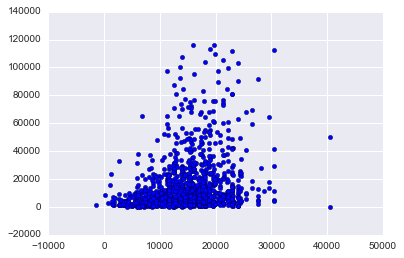

In [85]:
plt.scatter(predicted, y)

In [90]:
#create pivot table adding up the Bottle Sold, Volume Sold (Liters), and Sale (Dollars) by Store Number, Zip Code\
# , and Year

df8 = pd.pivot_table(df7, index=['Zip Code'], \
               values=['Sale (Dollars)'], aggfunc=sum).reset_index()

In [91]:
# create new dataframe merging the demo database with the result of the pivot table
df9 = df8.merge(df7, left_on='Zip Code', right_on='Zip Code')
df9.head()

,Zip Code,Sale (Dollars)_x,Stores per Zip,Store Number,Year,Bottles Sold,Sale (Dollars)_y,Volume Sold (Liters),Area,Total Pop,...,Single Occupancy,Avg HH Size,Avg Family Size,Pop Below Poverty Level,% P25+ HS Grad,% P25-54 BA+,21-54 years,21+ years,P21-54/Stores/Zip,P21+/Stores/Zip
0,50002,4958.04,4,4417,2015,294,3482.94,225.00,50002,1339.0,...,185.0,2.25,2.86,1232.0,87.6,11.2,567.0,1007.0,141.75,251.750000
1,50002,4958.04,4,4753,2015,204,1475.10,110.85,50002,1339.0,...,185.0,2.25,2.86,1232.0,87.6,11.2,567.0,1007.0,141.75,251.750000
2,50003,38095.16,6,4384,2015,794,7306.21,596.31,50003,5835.0,...,529.0,2.58,3.08,5816.0,91.0,24.0,2778.0,4012.0,463.00,668.666667
3,50003,38095.16,6,4678,2015,2040,30260.71,2096.21,50003,5835.0,...,529.0,2.58,3.08,5816.0,91.0,24.0,2778.0,4012.0,463.00,668.666667
4,50003,38095.16,6,4929,2015,84,528.24,45.00,50003,5835.0,...,529.0,2.58,3.08,5816.0,91.0,24.0,2778.0,4012.0,463.00,668.666667


In [92]:
X = df7[features]
y = df7['Sale (Dollars)']
ridge = linear_model.RidgeCV(cv=5)
model = ridge.fit(X,y)
model.score(X,y)

0.085633682928420232

In [93]:
model.alpha_

0.1

In [94]:
r2_score(y, model.predict(X))

0.085633682928420218

In [95]:
feature_imp = pd.DataFrame([features, model.coef_.tolist()], index=['feature', 'coef']).T

In [96]:
x = feature_imp.sort_values(by='coef', ascending=False)

In [97]:
x['coef'] = x['coef'].astype(float)

In [98]:
print x[((x['coef'] < 2) & (x['coef'] >-2))]['feature'].tolist()

['Hispanic or Latino', 'Native Amer', 'Owner occupied housing units', 'Med. Home Value', 'Year', 'Median HH Inc', 'Per Capita Inc', 'Zip Code']


In [99]:
drop_features = ['Year', 'Zip Code']

for i in drop_features:
    features.remove(i)

In [100]:
X = df7[features]
y = df7['Sale (Dollars)']
ridge = linear_model.RidgeCV(cv=5)
model = ridge.fit(X,y)
model.score(X,y)

0.085005289082062063

In [101]:
model.alpha_

0.1

In [102]:
r2_score(y, model.predict(X))

0.085005289082062063

In [103]:
feature_imp = pd.DataFrame([features, model.coef_.tolist()], index=['feature', 'coef']).T
x = feature_imp.sort_values(by='coef', ascending=False)
x['coef'] = x['coef'].astype(float)
print x[((x['coef'] < 2) & (x['coef'] >-2))]['feature'].tolist()

['Single Occupancy', 'Native Amer', 'Hispanic or Latino', 'Med. Home Value', 'Median HH Inc', 'Owner occupied housing units', 'Per Capita Inc']


In [105]:
x

,feature,coef
13,% P16+ in labor force,287.669846
29,% P25-54 BA+,139.402436
0,Stores per Zip,88.539170
8,Pac Islander,33.141408
33,P21+/Stores/Zip,23.413676
16,Tot Housing units,7.074752
10,Bi- Multi-Racial,6.847845
1,Total Pop,5.983557
20,Family households,4.703359
31,21+ years,3.777849
